In [2]:
from keras.preprocessing.image import ImageDataGenerator 
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D 
from keras.layers import Activation, Dropout, Flatten, Dense 
from keras import backend as K 

In [8]:
training_data_dir = 'F:/deep learning/day-night-image-classifier-master/day_night_images - Copy/training'
validation_data_dir = 'F:/deep learning/day-night-image-classifier-master/day_night_images - Copy/val'
test_data_dir = 'F:/deep learning/day-night-image-classifier-master/day_night_images - Copy/test'

In [9]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True)
validation_data_generator = ImageDataGenerator(rescale=1./255)
test_data_generator = ImageDataGenerator(rescale=1./255)

In [10]:
IMAGE_WIDTH, IMAGE_HEIGHT = 800, 600
BATCH_SIZE=16

In [11]:
if K.image_data_format() == 'channels_first': 
    input_shape = (3, IMAGE_WIDTH, IMAGE_HEIGHT) 
else: 
    input_shape = (IMAGE_WIDTH, IMAGE_HEIGHT, 3)

In [ ]:
input_shape

In [12]:
training_generator = training_data_generator.flow_from_directory(
    training_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
validation_generator = validation_data_generator.flow_from_directory(
    validation_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode="binary")
test_generator = test_data_generator.flow_from_directory(
    test_data_dir,
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=1,
    class_mode=None, 
    shuffle=False)

Found 192 images belonging to 2 classes.
Found 48 images belonging to 2 classes.
Found 160 images belonging to 1 classes.


In [14]:
model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = input_shape)) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 
  
model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(1)) 
model.add(Activation('sigmoid')) 
  
model.compile(loss ='binary_crossentropy', 
                     optimizer ='rmsprop', 
                   metrics =['accuracy']) 

In [16]:
model.fit_generator(
    training_generator,
    steps_per_epoch=len(training_generator.filenames) // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=len(validation_generator.filenames) // BATCH_SIZE)
#     callbacks=[PlotLossesKeras(), CSVLogger(TRAINING_LOGS_FILE,
#                                             append=False,
#                                             separator=";")])

Epoch 1/10
12/12 [==============================] - 124s 10s/step - loss: 1.7297 - acc: 0.7292 - val_loss: 0.1422 - val_acc: 0.9167
Epoch 2/10
12/12 [==============================] - 61s 5s/step - loss: 0.0482 - acc: 0.9792 - val_loss: 3.2063e-04 - val_acc: 1.0000
Epoch 3/10
12/12 [==============================] - 62s 5s/step - loss: 0.0018 - acc: 1.0000 - val_loss: 8.4595e-04 - val_acc: 1.0000
Epoch 4/10
12/12 [==============================] - 62s 5s/step - loss: 0.1099 - acc: 0.9792 - val_loss: 0.0021 - val_acc: 1.0000
Epoch 5/10
12/12 [==============================] - 65s 5s/step - loss: 0.0019 - acc: 1.0000 - val_loss: 6.5767e-04 - val_acc: 1.0000
Epoch 6/10
12/12 [==============================] - 63s 5s/step - loss: 0.0020 - acc: 1.0000 - val_loss: 1.8900e-05 - val_acc: 1.0000
Epoch 7/10
12/12 [==============================] - 62s 5s/step - loss: 0.0391 - acc: 0.9844 - val_loss: 9.1527e-04 - val_acc: 1.0000
Epoch 8/10
12/12 [==============================] - 61s 5s/step - lo

In [15]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

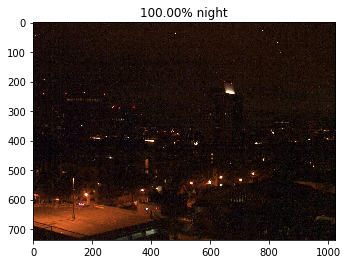

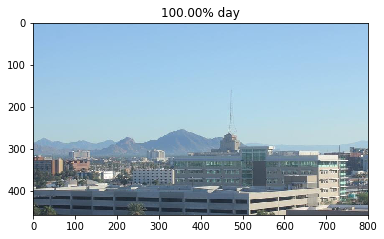

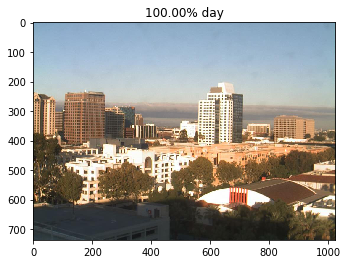

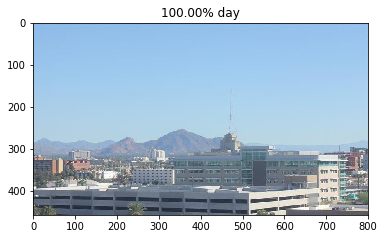

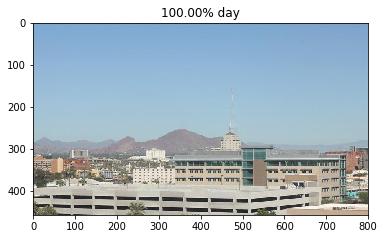

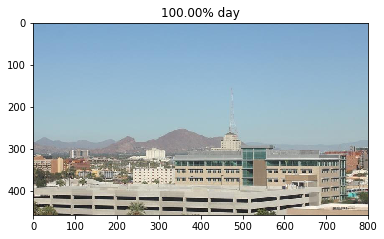

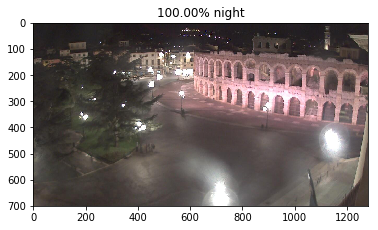

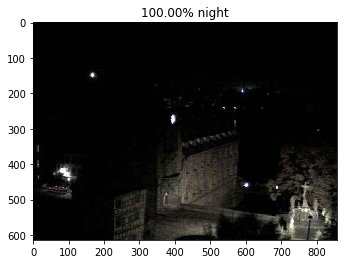

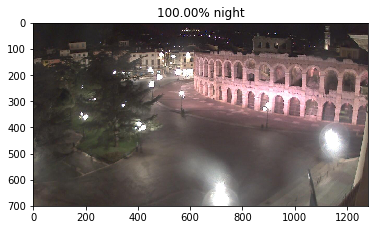

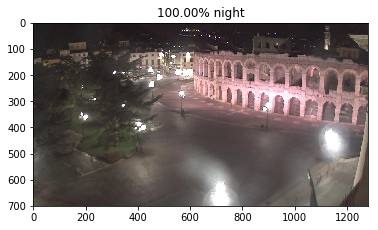

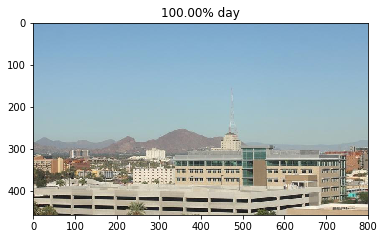

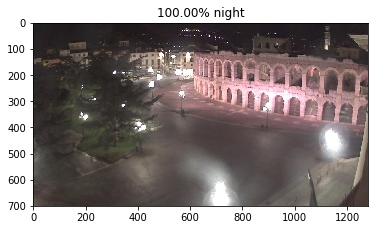

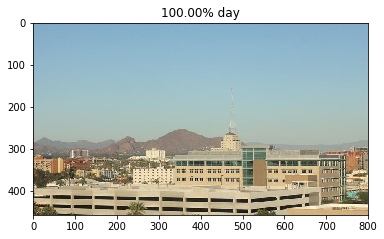

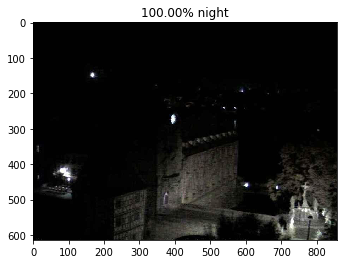

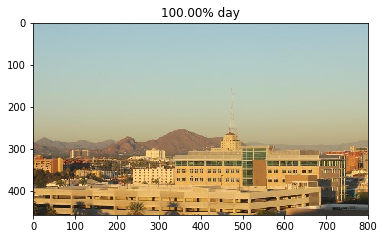

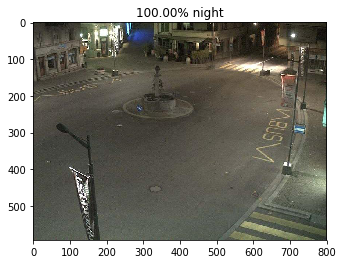

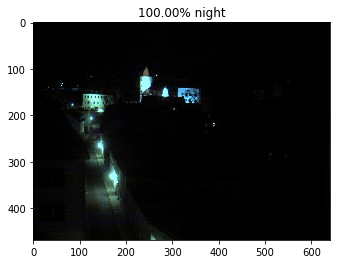

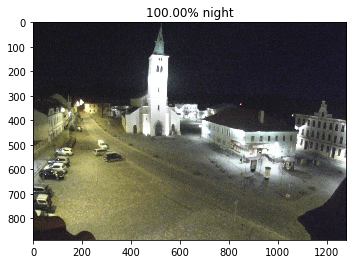

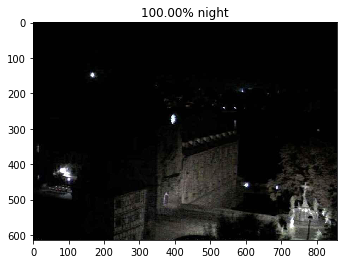

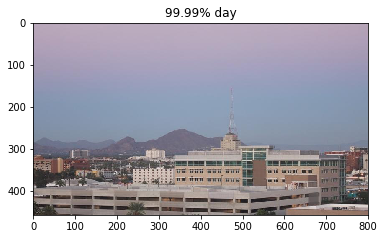

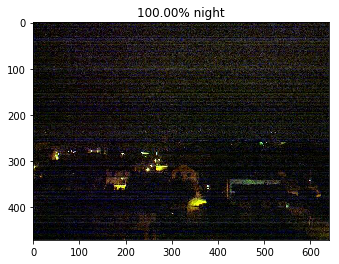

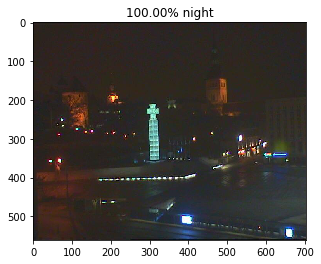

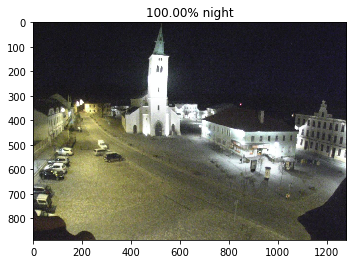

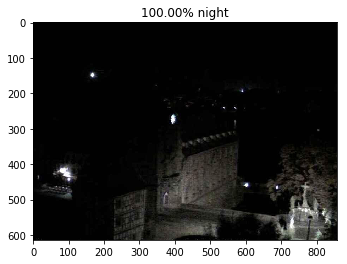

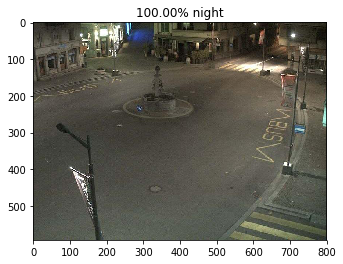

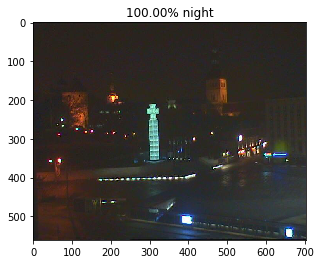

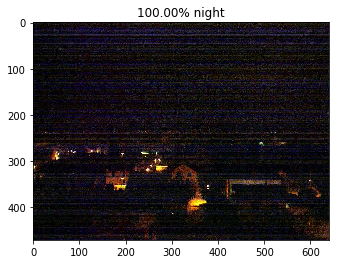

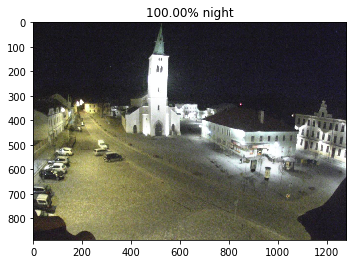

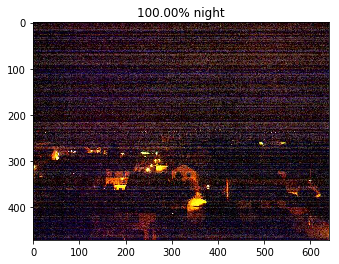

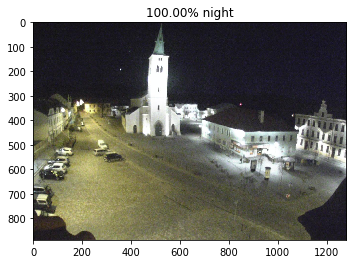

In [18]:
probabilities = model.predict_generator(test_generator, 30)
for index, probability in enumerate(probabilities):
    image_path = test_data_dir + "/" +test_generator.filenames[index]
    img = mpimg.imread(image_path)
    plt.imshow(img)
    if probability > 0.5:
        plt.title("%.2f" % (probability[0]*100) + "% night")
    else:
        plt.title("%.2f" % ((1-probability[0])*100) + "% day")
    plt.show()